## 4. Unsupervised machine learning: clustering

- apply a clustering algorithm for segmentation of the employees in groups of similarity
- evaluate the quality of the results by calculating a silhouette score and recommend a cluster
configuration with the highest score

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt  
import seaborn as sns     

import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")      

In [2]:
dataset = '../data/HR-Employee-Attrition.csv'
df = pd.read_csv(dataset, header=0)

Checking to see which columns should be used: 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'JobSatisfaction',
            'EnvironmentSatisfaction', 'YearsAtCompany', 'Education', 'YearsWithCurrManager']

In [6]:
X = df[features]
X.head()


,Age,DistanceFromHome,MonthlyIncome,JobSatisfaction,EnvironmentSatisfaction,YearsAtCompany,Education,YearsWithCurrManager
0,41,1,5993,4,2,6,2,5
1,49,8,5130,2,3,10,1,7
2,37,2,2090,3,4,0,2,0
3,33,3,2909,3,4,8,4,0
4,27,2,3468,2,1,2,1,2


Clustering models like KMeans rely on distance calculations, so it's important that all features are on the same scale.  
We apply `StandardScaler` to transform the data so that each feature has a mean of 0 and a standard deviation of 1.  
This prevents high-range variables like income from dominating the clustering results.

In [ ]:
# Standardizing the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Printing out the first 5 rows to see the outcome

In [9]:
print(X_scaled[:5])

[[ 0.4463504  -1.01090934 -0.10834951  1.15325359 -0.66053067 -0.16461311
  -0.89168825  0.24583399]
 [ 1.32236521 -0.14714972 -0.29171859 -0.66085318  0.25462493  0.48850773
  -1.86842575  0.80654148]
 [ 0.008343   -0.88751511 -0.93765369  0.2462002   1.16978053 -1.14429437
  -0.89168825 -1.15593471]
 [-0.42966441 -0.76412088 -0.76363368  0.2462002   1.16978053  0.16194731
   1.06178675 -1.15593471]
 [-1.08667552 -0.88751511 -0.64485811 -0.66085318 -1.57568627 -0.81773395
  -1.86842575 -0.59522723]]


Find best K using silhouette score. We test different cluster sizes and pick the one with the best separation.

In [20]:
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)

# Calculating silhuette score
    score = silhouette_score(X_scaled, model.labels_)

    print(f"K={k}, Silhouette Score = {score:.4f}")

K=2, Silhouette Score = 0.2001
K=3, Silhouette Score = 0.1232
K=4, Silhouette Score = 0.1365
K=5, Silhouette Score = 0.1378
K=6, Silhouette Score = 0.1411
K=7, Silhouette Score = 0.1365
K=8, Silhouette Score = 0.1315
K=9, Silhouette Score = 0.1340
K=10, Silhouette Score = 0.1302


We selected **K=2** as the number of clusters because it produced the **highest silhouette score (0.2001)** compared to other tested values (K=3–10).  
This indicates that the employees in each group are well-clustered internally and clearly separated from the other group.  
Therefore, K=2 gives the most meaningful segmentation of the dataset for further analysis.


In [23]:
final_model = KMeans(n_clusters=2, random_state=42, n_init=10)
final_model.fit(X_scaled)

df['Cluster'] = final_model.labels_

In [25]:
df.groupby('Cluster').mean(numeric_only=True)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Cluster,,,,,,,,,,,,,,,,,,,,,
0,42.526210,790.554435,9.300403,3.141129,1.0,1021.419355,2.782258,65.314516,2.747984,3.032258,...,2.756048,80.0,0.834677,18.227823,2.760081,2.764113,12.764113,7.387097,4.379032,7.580645
1,34.070842,808.561602,9.137577,2.796715,1.0,1026.620123,2.690965,66.184805,2.720739,1.570842,...,2.689938,80.0,0.773101,7.741273,2.819302,2.759754,4.077002,2.621150,1.071869,2.362423


The KMeans clustering with K=2 revealed two distinct groups of employees:

- **Cluster 0** consists mostly of older, experienced employees with longer tenure, higher job levels, and more stable relationships with managers. 
- **Cluster 1** includes younger employees with fewer years at the company, lower job levels, and shorter time in their current roles.

This segmentation could help identify which employees are more at risk of attrition (e.g., Cluster 1), allowing HR to design targeted retention strategies.


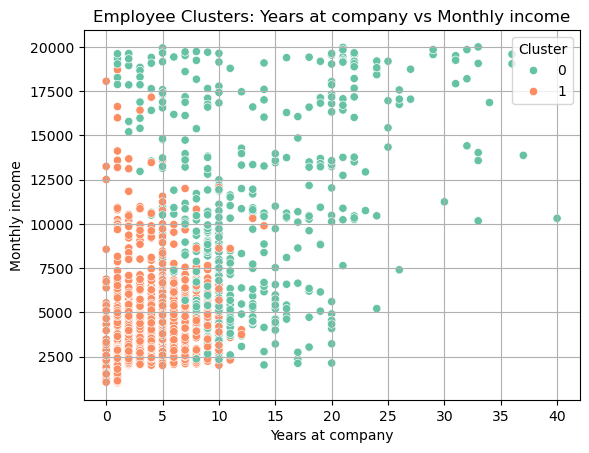

In [26]:
sns.scatterplot(data=df, x='YearsAtCompany', y='MonthlyIncome', hue='Cluster', palette='Set2')
plt.title("Employee Clusters: Years at company vs Monthly income")
plt.xlabel("Years at company")
plt.ylabel("Monthly income")
plt.grid(True)
plt.show()

The scatter plot of "Years at Company" vs "Monthly Income" shows a clear separation between the two clusters.

- **Cluster 1** (orange) consists of employees who are new to the company, typically earning lower salaries.  
- **Cluster 0** (green) includes employees who have been with the company longer and earn higher monthly incomes.

This confirms that the clustering successfully identified two key employee segments:  
those early in their careers and those with long tenure and higher earnings.  


In [27]:
df.groupby(['Cluster', 'Department'])['EmployeeNumber'].count()


Cluster  Department            
0        Human Resources            20
         Research & Development    317
         Sales                     159
1        Human Resources            43
         Research & Development    644
         Sales                     287
Name: EmployeeNumber, dtype: int64

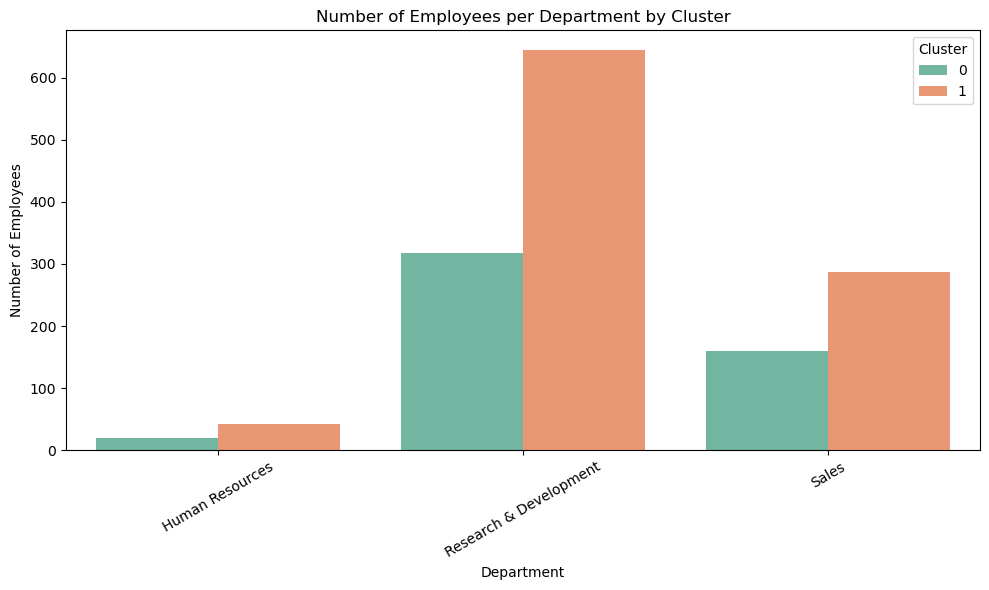

In [32]:

# Creating a new DataFrame from the groupby result
cluster_dept_counts = df.groupby(['Cluster', 'Department'])['EmployeeNumber'].count().reset_index()
cluster_dept_counts.rename(columns={'EmployeeNumber': 'Count'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_dept_counts, x='Department', y='Count', hue='Cluster', palette='Set2')

plt.title('Number of Employees per Department by Cluster')
plt.ylabel('Number of Employees')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Cluster Distribution by Department

The bar chart shows how employees are distributed across clusters within each department.

We observe that in all departments — especially in **Research & Development** and **Sales** — the majority of employees belong to **Cluster 1**, which was earlier identified as the group characterized by shorter tenure, lower income, and lower job level.

This indicates that these departments contain a large proportion of employees who are newer or earlier in their career path. 

This pattern reinforces the clustering results and supports the idea that **the model is segmenting employees in a meaningful way** based on career progression.


In [29]:
df.groupby(['Gender', 'Department'])['MonthlyIncome'].mean()

Gender  Department            
Female  Human Resources           7264.000000
        Research & Development    6513.691293
        Sales                     6972.126984
Male    Human Resources           6371.023256
        Research & Development    6129.888316
        Sales                     6949.645914
Name: MonthlyIncome, dtype: float64

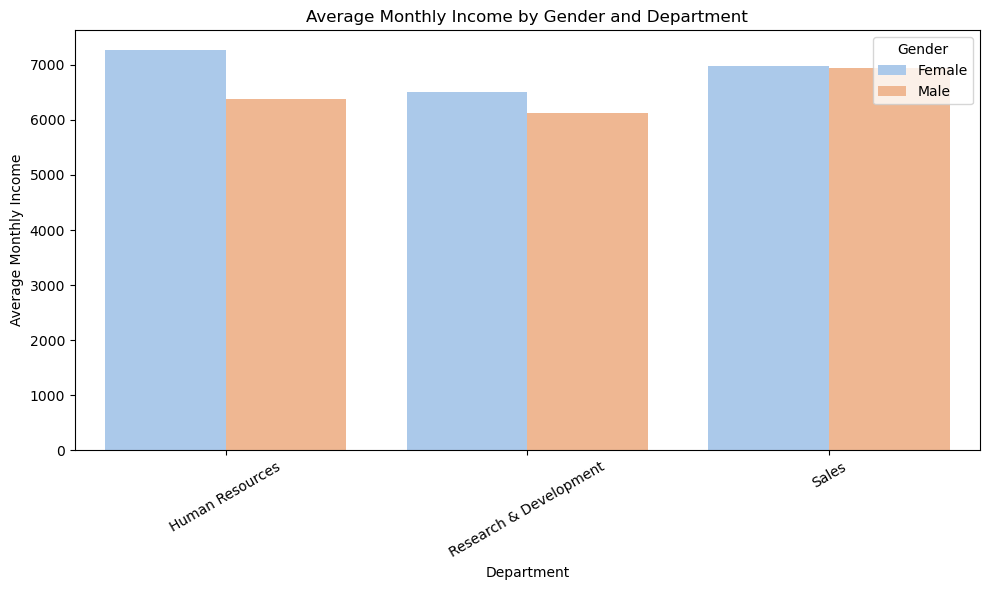

In [34]:
gender_income = df.groupby(['Gender', 'Department'])['MonthlyIncome'].mean().reset_index()
gender_income.rename(columns={'MonthlyIncome': 'AvgIncome'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_income, x='Department', y='AvgIncome', hue='Gender', palette='pastel')

plt.title('Average Monthly Income by Gender and Department')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Gender-Based Income Comparison by Department

The chart shows the average monthly income of male and female employees across departments.

There are **no significant gender-based pay differences** in Research & Development or Sales, where average salaries are almost identical.

However, in **Human Resources**, female employees appear to earn noticeably more on average than their male counterparts.  
This could be due to more experienced or higher-level female staff in that department, but further analysis would be needed to confirm that.

Overall, the income distribution between genders is relatively balanced in this dataset.


In [35]:
df.groupby('Cluster')[['DistanceFromHome', 'WorkLifeBalance']].mean()


,DistanceFromHome,WorkLifeBalance
Cluster,,
0,9.300403,2.764113
1,9.137577,2.759754


<function matplotlib.pyplot.show(close=None, block=None)>

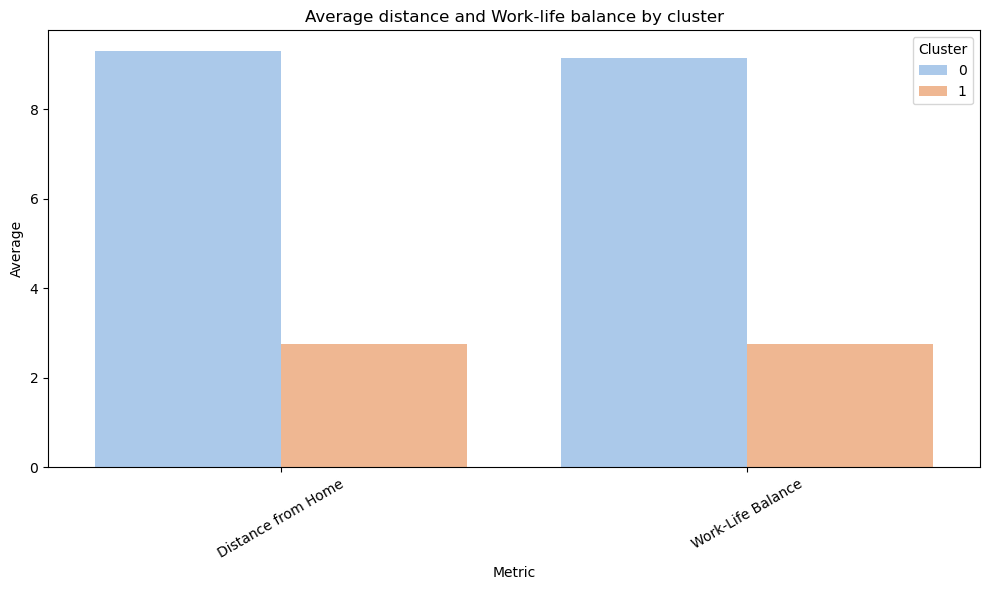

In [38]:
cluster_balance = df.groupby('Cluster')[['DistanceFromHome', 'WorkLifeBalance']].mean().reset_index()
cluster_balance.rename(columns={
    'DistanceFromHome': 'AvgDistance',
    'WorkLifeBalance': 'AvgWorkLife'
}, inplace=True)

balance_long = pd.DataFrame({
  'Cluster': cluster_balance['Cluster'].tolist() * 2,
  'Metric': ['Distance from Home'] * len(cluster_balance) + ['Work-Life Balance'] * len(cluster_balance),
  'Average': cluster_balance[['AvgDistance', 'AvgWorkLife']].values.flatten()
})

plt.figure(figsize=(10, 6))
sns.barplot(data=balance_long, x='Metric', y='Average', hue='Cluster', palette='pastel')

plt.title('Average distance and Work-life balance by cluster')
plt.ylabel('Average')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show



In [40]:
print(cluster_balance)

   Cluster  AvgDistance  AvgWorkLife
0        0     9.300403     2.764113
1        1     9.137577     2.759754


### Distance and Work-Life Balance by Cluster

The chart shows that both clusters have very similar average values for distance from home and work-life balance.

- The average distance from home is just slightly higher in Cluster 0 (9.30) compared to Cluster 1 (9.14).
- Work-life balance ratings are almost identical in both clusters, around 2.76 on average.

This suggests that **these two factors are not strongly related to the segmentation in this clustering model**, and may not be decisive for employee retention on their own.


In [41]:
# testing to see if both together has a correlation
correlation = df[['DistanceFromHome', 'WorkLifeBalance']].corr()
print(correlation)

                  DistanceFromHome  WorkLifeBalance
DistanceFromHome          1.000000        -0.026556
WorkLifeBalance          -0.026556         1.000000


### Correlation Between Distance from Home and Work-Life Balance

Although both metrics were included in the clustering analysis, the correlation between `DistanceFromHome` and `WorkLifeBalance` was calculated to be **-0.026**, which is effectively zero.

This result indicates that **there is no meaningful relationship** between these two variables — employees who live farther away from work do not report significantly different work-life balance scores compared to those who live closer.

Therefore, these variables may not be useful as predictors of each other or key drivers in employee segmentation.


In [31]:
df.groupby('Education')['JobSatisfaction'].mean()


Education
1    2.800000
2    2.769504
3    2.652098
4    2.786432
5    2.666667
Name: JobSatisfaction, dtype: float64

C:\Users\nadia\AppData\Local\Temp\ipykernel_2116\1613211063.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_satisfaction, x='Education', y='AvgSatisfaction', palette='pastel')


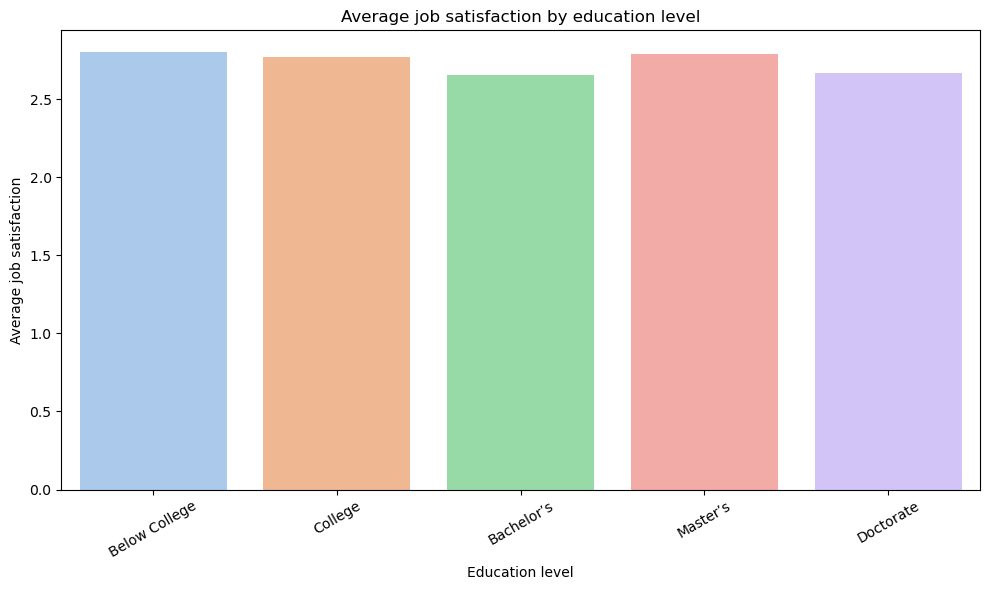

In [49]:
education_satisfaction = df.groupby('Education')['JobSatisfaction'].mean().reset_index()
education_satisfaction['Education'] = education_satisfaction['Education'].map({
    1: 'Below College',
    2: 'College',
    3: 'Bachelor’s',
    4: 'Master’s',
    5: 'Doctorate'
})
education_satisfaction.rename(columns={
    'JobSatisfaction' : 'AvgSatisfaction'
}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=education_satisfaction, x='Education', y='AvgSatisfaction', palette='pastel')

plt.title('Average job satisfaction by education level')
plt.ylabel('Average job satisfaction')
plt.xlabel('Education level')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Relationship Between Education and Job Satisfaction

The chart and table show the average job satisfaction for each education level.

Surprisingly, employees with **lower education levels** (particularly level 1) report the **highest satisfaction**, while those with **higher education levels** (level 5) show **lower-than-average satisfaction**.

There is **no clear positive correlation** between education level and job satisfaction in this dataset. This suggests that factors other than education — such as role, work environment, or expectations — may play a more significant role in employee satisfaction.
